# Importing libraries

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Reading Data

In [335]:
df = pd.read_csv('online_retail_II.csv')

# Data Expolatory and Cleaning

In [336]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [337]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [338]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [339]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Year'] = df['InvoiceDate'].dt.year
df['Quarter'] = df['InvoiceDate'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   TotalPrice   1067371 non-null  float64       
 9   Month        1067371 non-null  period[M]     
 10  Date         1067371 non-null  object        
 11  DayOfWeek    1067371 non-null  object        
 12  Hour         1067371 non-null  int32         
 13  Year         1067371 non-null  int32         
 14  Quarter      1067371 non-null  object        
dtypes: datetime64[n

Description and Customer ID columns have some missing values                                                                          
                                                                               
                                                                            

## Checking Null Values

In [341]:
df.isnull().sum() #Checking how many values are missing

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
TotalPrice          0
Month               0
Date                0
DayOfWeek           0
Hour                0
Year                0
Quarter             0
dtype: int64

Customer ID column has 243007 missing value. it might be test invoices so Identify the test data and test customer ids and remove them from the data.

In [342]:
df[df['Description'].str.contains('sample|test|dummy', case=False, na=False)]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,45.00,2009-12,2009-12-14,Monday,8,2009,2009-Q4
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,22.50,2009-12,2009-12-14,Monday,11,2009,2009-Q4
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,22.50,2009-12,2009-12-14,Monday,11,2009,2009-Q4
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,22.50,2009-12,2009-12-18,Friday,10,2009,2009-Q4
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,1.00,2009-12,2009-12-18,Friday,10,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939608,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom,-33.05,2011-10,2011-10-24,Monday,11,2011,2011-Q4
945127,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom,33.05,2011-10,2011-10-26,Wednesday,12,2011,2011-Q4
1006422,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom,-2.89,2011-11,2011-11-18,Friday,14,2011,2011-Q4
1006423,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom,-75.00,2011-11,2011-11-18,Friday,14,2011,2011-Q4


I am removing both test and sample data as i want to focus only on actual sales (i.e., not free items).

In [343]:
df_cleaned = df[~df['Description'].str.contains('test', case=False, na=False)]
df_cleaned = df[~df['Description'].str.contains('sample', case=False, na=False)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067263 entries, 0 to 1067370
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067263 non-null  object        
 1   StockCode    1067263 non-null  object        
 2   Description  1062881 non-null  object        
 3   Quantity     1067263 non-null  int64         
 4   InvoiceDate  1067263 non-null  datetime64[ns]
 5   Price        1067263 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067263 non-null  object        
 8   TotalPrice   1067263 non-null  float64       
 9   Month        1067263 non-null  period[M]     
 10  Date         1067263 non-null  object        
 11  DayOfWeek    1067263 non-null  object        
 12  Hour         1067263 non-null  int32         
 13  Year         1067263 non-null  int32         
 14  Quarter      1067263 non-null  object        
dtypes: datetime64[ns](1)

In [344]:
df_cleaned.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    242899
Country             0
TotalPrice          0
Month               0
Date                0
DayOfWeek           0
Hour                0
Year                0
Quarter             0
dtype: int64

Customer Id column still have 242899 null value. However, customers can buys without creating an account. So i am leaving it as it is

In [345]:
#Handling Description
description_null = df_cleaned[df_cleaned['Description'].isnull()]
description_null

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-01,Tuesday,17,2009,2009-Q4
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom,0.0,2009-12,2009-12-01,Tuesday,17,2009,2009-Q4
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom,0.0,2009-12,2009-12-02,Wednesday,11,2009,2009-Q4
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-02,Wednesday,12,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-08,Thursday,10,2011,2011-Q4


In [346]:
description_null[(description_null['Price'] == 0) &(description_null['Customer ID'].isnull())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-01,Tuesday,17,2009,2009-Q4
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom,0.0,2009-12,2009-12-01,Tuesday,17,2009,2009-Q4
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom,0.0,2009-12,2009-12-02,Wednesday,11,2009,2009-Q4
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom,-0.0,2009-12,2009-12-02,Wednesday,12,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-07,Wednesday,18,2011,2011-Q4
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0,2011-12,2011-12-08,Thursday,10,2011,2011-Q4


It shows all row with null Description also and null Customer ID and 0 Price . Its not needed so i will remove it 

In [347]:
df_cleaned = df_cleaned[df_cleaned['Description'].notnull()]
df_cleaned.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238517
Country             0
TotalPrice          0
Month               0
Date                0
DayOfWeek           0
Hour                0
Year                0
Quarter             0
dtype: int64

# Checking Duplicates

In [348]:
#Checking Duplicates
df_cleaned.duplicated().sum()

34225

In [349]:
duplicates = df_cleaned[df_cleaned.duplicated(keep=False)].sort_values(by=['InvoiceDate','Invoice','StockCode'])
duplicates

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom,1.95,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom,1.95,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,3.75,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,3.75,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,3.75,2009-12,2009-12-01,Tuesday,11,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067116,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom,1.25,2011-12,2011-12-09,Friday,11,2011,2011-Q4
1067117,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49,2011-12,2011-12-09,Friday,11,2011,2011-Q4
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49,2011-12,2011-12-09,Friday,11,2011,2011-Q4
1067127,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom,2.08,2011-12,2011-12-09,Friday,11,2011,2011-Q4


It shows same product is purchased by the customer on the same invoice.I assume there was some glitch in the system that didn't increment the Quantity but instead captured multi-buy items as different line items on the same invoice. So I will not be dropping these records out of the analysis. 

In [350]:
# Checking Duplicates recorded each month
duplicates_in_month= duplicates['Month'].value_counts().sort_index()
duplicates_in_month

Month
2009-12      977
2010-01      628
2010-02      631
2010-03     1014
2010-04      801
2010-05      814
2010-06     1004
2010-07      766
2010-08      708
2010-09      940
2010-10     1636
2010-11     2747
2010-12    45163
2011-01      475
2011-02      443
2011-03      593
2011-04      415
2011-05      484
2011-06      487
2011-07      495
2011-08      433
2011-09      707
2011-10     1482
2011-11     2641
2011-12      538
Freq: M, Name: count, dtype: int64

Text(0, 0.5, 'Number of Duplicates')

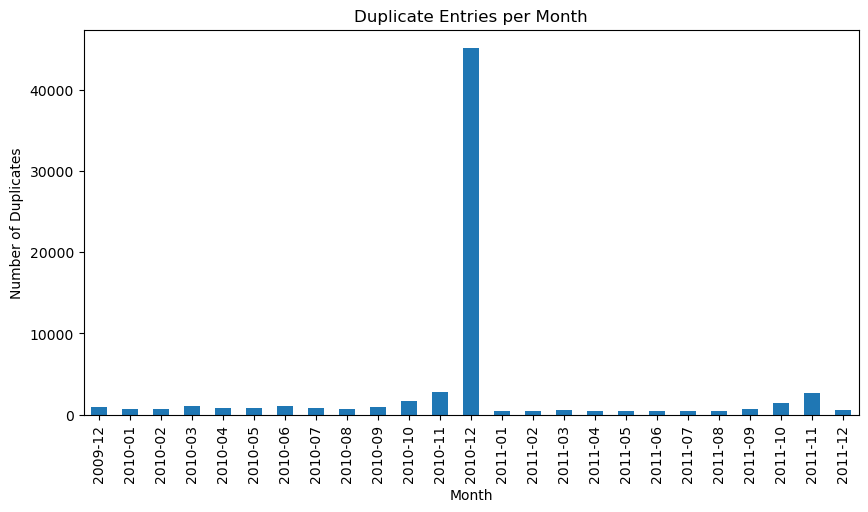

In [351]:
duplicates_in_month.plot(kind='bar', figsize=(10, 5))
plt.title('Duplicate Entries per Month')
plt.ylabel('Number of Duplicates')

The massive spike in duplicates during December 2010 (45,163 entries) is unusual — especially when compared to other months with counts in the hundreds or low thousands. This pattern strongly suggests a potential glitch in the data collection or processing pipeline during that period.



In [352]:
dec_2010 = df_cleaned[(df_cleaned['InvoiceDate'].dt.year == 2010) & (df_cleaned['InvoiceDate'].dt.month == 12)]
dec_dupes = dec_2010[dec_2010.duplicated(keep=False)]
duplicates_by_day = dec_dupes.groupby('Date').size()
duplicates_by_day

Date
2010-12-01    6196
2010-12-02    4214
2010-12-03    4344
2010-12-05    5450
2010-12-06    7736
2010-12-07    5906
2010-12-08    5276
2010-12-09    5706
2010-12-10      56
2010-12-12     100
2010-12-13      13
2010-12-14      47
2010-12-15      23
2010-12-16      38
2010-12-17       6
2010-12-19      38
2010-12-20       6
2010-12-21       4
2010-12-22       2
2010-12-23       2
dtype: int64

Text(0, 0.5, 'Number of Duplicates')

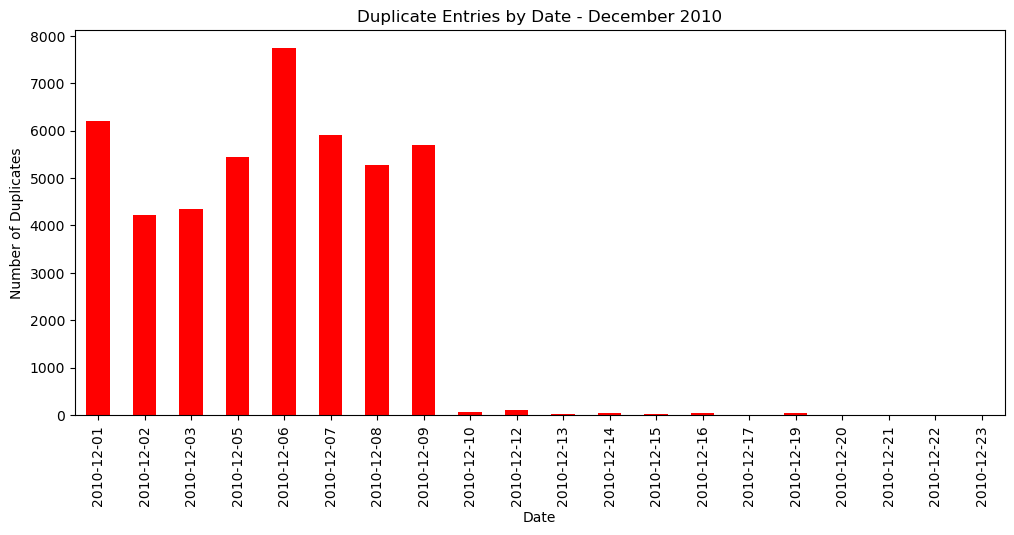

In [374]:
duplicates_by_day.plot(kind='bar', figsize=(12, 5), color='red')
plt.title('Duplicate Entries by Date - December 2010')
plt.xlabel('Date')
plt.ylabel('Number of Duplicates')

To investigate further, duplicates were grouped by invoice date, revealing that a large concentration of these records occurred on just a few specific days. This pattern strongly suggests a potential glitch in the data collection or processing pipeline during that period.
Possibly due to Accidental duplication during data import or merging of files.
Duplicates in this days are to large so i am removing it

In [354]:
mask_dec1_9 = (df_cleaned['InvoiceDate'].dt.date >= pd.to_datetime('2010-12-01').date()) & \
              (df_cleaned['InvoiceDate'].dt.date <= pd.to_datetime('2010-12-09').date())

df_dec1_9 = df_cleaned[mask_dec1_9]

In [355]:
duplicates_dec1_9 = df_dec1_9[df_dec1_9.duplicated(keep=False)].sort_values(by=['InvoiceDate','Invoice','StockCode'])
duplicates_dec1_9


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
502944,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12,2010-12-01,Wednesday,8,2010,2010-Q4
525467,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12,2010-12-01,Wednesday,8,2010,2010-Q4
502943,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12,2010-12-01,Wednesday,8,2010,2010-Q4
525466,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12,2010-12-01,Wednesday,8,2010,2010-Q4
502939,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday,8,2010,2010-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547958,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,1.95,2010-12,2010-12-09,Thursday,20,2010,2010-Q4
525407,538171,84991,60 TEATIME FAIRY CAKE CASES,1,2010-12-09 20:01:00,0.55,17530.0,United Kingdom,0.55,2010-12,2010-12-09,Thursday,20,2010,2010-Q4
547930,538171,84991,60 TEATIME FAIRY CAKE CASES,1,2010-12-09 20:01:00,0.55,17530.0,United Kingdom,0.55,2010-12,2010-12-09,Thursday,20,2010,2010-Q4
525442,538171,85152,HAND OVER THE CHOCOLATE SIGN,3,2010-12-09 20:01:00,2.10,17530.0,United Kingdom,6.30,2010-12,2010-12-09,Thursday,20,2010,2010-Q4


In [356]:
df_cleaned = df_cleaned[~mask_dec1_9]
df_cleaned.duplicated().sum()

11490

In [357]:
#Cancelled Order
cancelled_invoices = df_cleaned[df_cleaned['Invoice'].str.startswith('C', na=False)] #See cancelled orders
cancelled_invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12,2009-12-01,Tuesday,10,2009,2009-Q4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90,2009-12,2009-12-01,Tuesday,10,2009,2009-Q4
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00,2009-12,2009-12-01,Tuesday,10,2009,2009-Q4
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60,2009-12,2009-12-01,Tuesday,10,2009,2009-Q4
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12,2009-12-01,Tuesday,10,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011-12,2011-12-09,Friday,9,2011,2011-Q4
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011-12,2011-12-09,Friday,10,2011,2011-Q4
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011-12,2011-12-09,Friday,11,2011,2011-Q4
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011-12,2011-12-09,Friday,11,2011,2011-Q4


In [358]:
regular_invoices = df_cleaned[~df_cleaned['Invoice'].str.startswith('C', na=False)]
regular_invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12,2009-12-01,Tuesday,7,2009,2009-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,2011-12-09,Friday,12,2011,2011-Q4
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-09,Friday,12,2011,2011-Q4
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-09,Friday,12,2011,2011-Q4
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-09,Friday,12,2011,2011-Q4


In [359]:
regular_sum = regular_invoices['TotalPrice'].sum()
regular_sum

19936076.278000005

In [360]:
cancelled_sum = cancelled_invoices['TotalPrice'].sum()*(-1)
cancelled_sum

1397866.7100000002

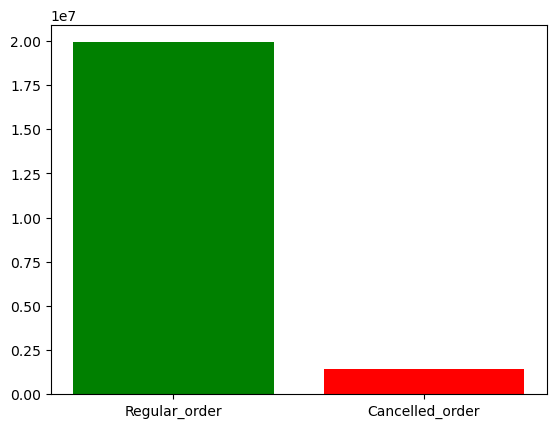

In [361]:
plt.bar(['Regular_order','Cancelled_order'],[regular_sum, cancelled_sum], color=['green', 'red'])
plt.show()

The bar chart illustrates the ratio between regular and cancelled invoices in the dataset. A significantly higher number of regular invoices indicates that most transactions were completed successfully. Cancelled invoices represent a smaller proportion, which is expected in typical sales operations. However, monitoring this ratio is important — a sudden spike in cancellations could indicate issues like customer dissatisfaction, inventory problems, or system errors.

In [362]:
#Invoice starts with A
df_cleaned[df_cleaned['Invoice'].str.startswith('A', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Date,DayOfWeek,Hour,Year,Quarter
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,-53594.36,2010-04,2010-04-29,Thursday,13,2010,2010-Q2
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,-44031.79,2010-07,2010-07-19,Monday,11,2010,2010-Q3
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,-38925.87,2010-10,2010-10-20,Wednesday,12,2010,2010-Q4
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,2011-08,2011-08-12,Friday,14,2011,2011-Q3
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,2011-08,2011-08-12,Friday,14,2011,2011-Q3
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,2011-08,2011-08-12,Friday,14,2011,2011-Q3


Invoices starting with 'A' and having negative prices with the description 'Adjust bad debt' appear to represent accounting adjustments. These likely correspond to write-offs for uncollectible payments, often logged when a customer defaults or a refund is issued for a previously unpaid invoice. Such entries are typical in real-world transaction data for maintaining accurate financial records and ensuring compliance with accounting standards.

# Data Analysis

In [363]:
# Quarterly sales
quarterly_sales = df_cleaned.groupby('Quarter')['TotalPrice'].sum()
quarterly_sales

Quarter
2009-Q4     799847.110
2010-Q1    1924208.239
2010-Q2    1886181.172
2010-Q3    2086158.791
2010-Q4    2840020.902
2011-Q1    1742265.250
2011-Q2    1908678.811
2011-Q3    2384467.443
2011-Q4    2966381.850
Name: TotalPrice, dtype: float64

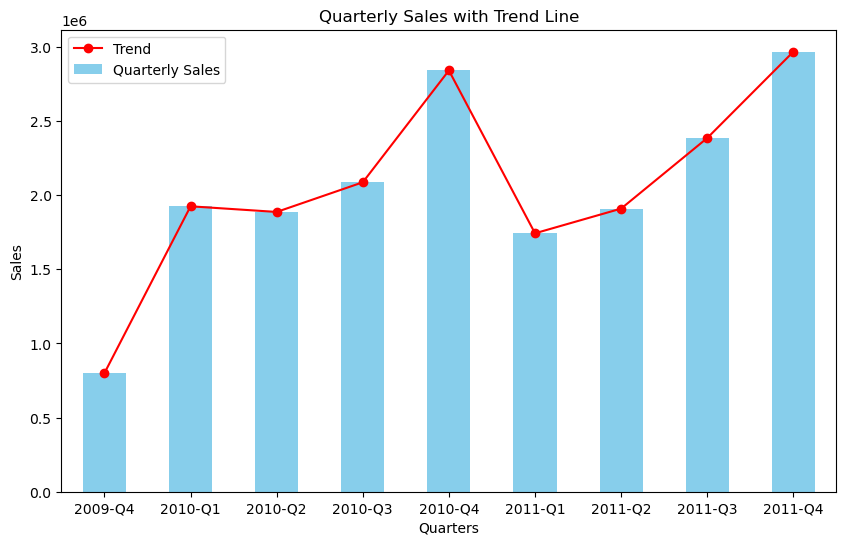

In [364]:
# bar chart (Quarterly sales)
quarterly_sales.plot(kind='bar', color='skyblue', label='Quarterly Sales', figsize=(10, 6))

# line chart (Trend)
quarterly_sales.plot(kind='line', color='red', marker='o', label='Trend')

plt.title('Quarterly Sales with Trend Line')
plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.legend()
plt.show()

This chart displays quarterly sales over the past year,. The x-axis represents each quarter, while the y-axis indicates total sales. The bar chart shows a sharp spike in sales in Q4 (low in 2009-Q4 due to limited data), which could likely be attributed to the seasonal holiday period. In contrast, sales in Q1 and Q3 appear to be relatively lower, suggesting potential seasonal fluctuations or lower demand during these periods. The trend line shows a steady upward trajectory, indicating that overall sales have been growing year over year.

In [365]:
# Total Invoice per month in each year
monthly_invoices = df_cleaned.groupby(['Year','Month'])['Invoice'].count()
monthly_invoices

Year  Month  
2009  2009-12    45000
2010  2010-01    31333
      2010-02    28878
      2010-03    41253
      2010-04    33933
      2010-05    34844
      2010-06    39806
      2010-07    33293
      2010-08    33146
      2010-09    41956
      2010-10    58933
      2010-11    77703
      2010-12    19940
2011  2011-01    35032
      2011-02    27614
      2011-03    36581
      2011-04    29689
      2011-05    36881
      2011-06    36775
      2011-07    39363
      2011-08    35196
      2011-09    50127
      2011-10    60633
      2011-11    84633
      2011-12    25511
Name: Invoice, dtype: int64

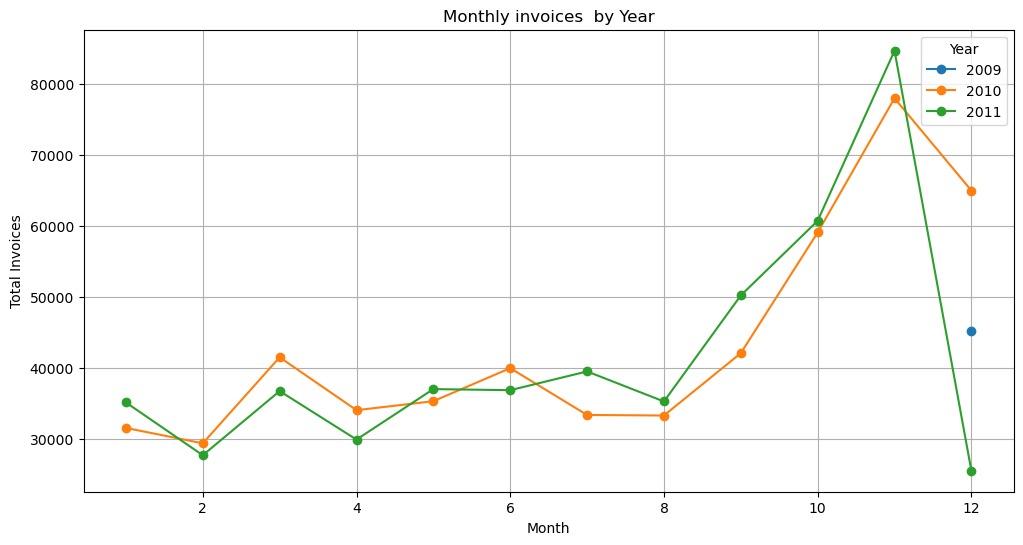

In [366]:
plt.figure(figsize=(12, 6))
for year in sorted(df['Year'].unique()):
    monthly_data = df[df['Year'] == year].groupby(df['InvoiceDate'].dt.month)['Invoice'].count()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=str(year))

plt.title('Monthly invoices  by Year')
plt.xlabel('Month')
plt.ylabel('Total Invoices')
plt.legend(title='Year')
plt.grid(True)
plt.show()

The visualization shows the number of invoices generated each month across multiple years. From August to December, there is a noticeable increase in activity, indicating the store experiences its highest customer engagement and sales during this period. In contrast, the months from January to July reflect relatively lower performance

In [378]:
# Country with most sales
country_invoice = df_cleaned.groupby('Country')['Invoice'].count().sort_values(ascending=False)
country_invoice

Country
United Kingdom          934364
EIRE                     17512
Germany                  17102
France                   13788
Netherlands               5136
Spain                     3721
Switzerland               3177
Belgium                   3099
Portugal                  2460
Australia                 1869
Channel Islands           1630
Italy                     1484
Sweden                    1364
Cyprus                    1176
Norway                    1161
Finland                   1049
Austria                    938
Denmark                    777
Unspecified                756
Greece                     663
Japan                      548
USA                        535
Poland                     519
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Canada                     228
Iceland                    191
RSA                        169
Bahrain                    126


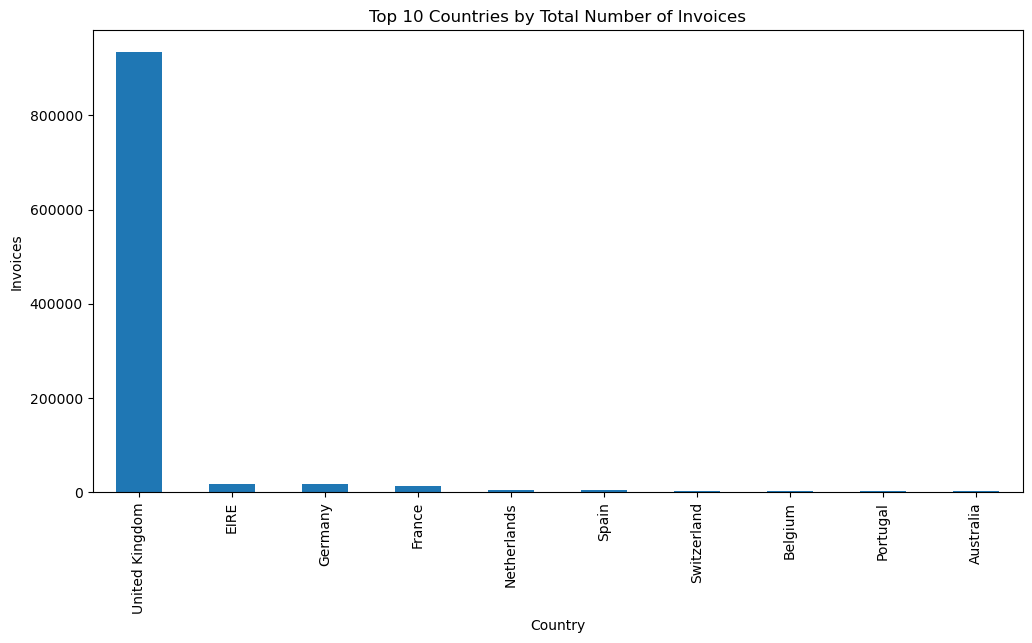

In [379]:
country_invoice.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Countries by Total Number of Invoices')
plt.xlabel('Country')
plt.ylabel('Invoices')
plt.show()

The bar chart displays the top 10 countries by total number of invoices. The United Kingdom overwhelmingly dominates the chart, indicating that the majority of transactions are concentrated there. Other countries such as EIRE, Germany, France, and the Netherlands appear in the top 10 but are significantly lower in comparison, suggesting limited international activity.

In [369]:
country_sales = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending =False)
country_sales

Country
United Kingdom          1.570056e+07
EIRE                    6.049690e+05
Netherlands             5.481398e+05
Germany                 4.070471e+05
France                  3.156653e+05
Australia               1.658948e+05
Switzerland             9.912196e+04
Spain                   9.027004e+04
Sweden                  8.780942e+04
Denmark                 6.317809e+04
Belgium                 6.288229e+04
Portugal                4.980776e+04
Channel Islands         4.072655e+04
Japan                   3.554762e+04
Norway                  3.166879e+04
Italy                   2.985775e+04
Finland                 2.951445e+04
Cyprus                  2.416274e+04
Austria                 2.317760e+04
Greece                  1.899549e+04
Hong Kong               1.403930e+04
Singapore               1.315816e+04
Israel                  1.110722e+04
Poland                  1.003177e+04
United Arab Emirates    9.948650e+03
Unspecified             9.687320e+03
USA                     6.2865

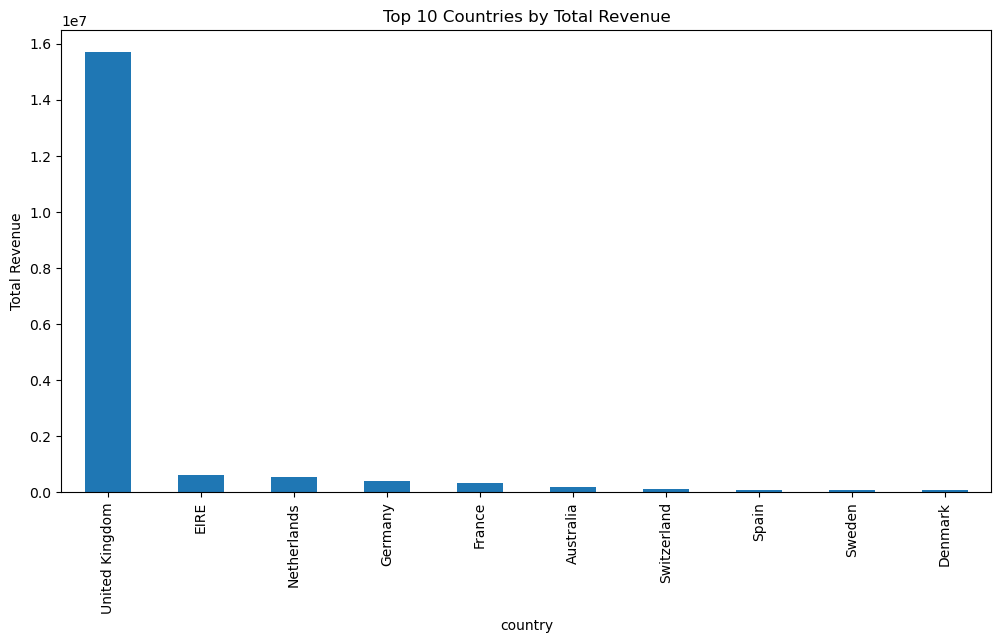

In [376]:
country_sales.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('country')
plt.ylabel('Total Revenue')
plt.show()

This chart displays the top 10 countries based on total revenue generated from sales. The United Kingdom leads by a significant margin, indicating it is the primary market for the business. Other countries like the EIRE, Netherlands, Germany, and France contribute notably less.

In [383]:
# Top Selling Product 
product_quantity = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
product_quantity

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     101027
WHITE HANGING HEART T-LIGHT HOLDER     89242
ASSORTED COLOUR BIRD ORNAMENT          78274
JUMBO BAG RED RETROSPOT                75262
BROCADE RING PURSE                     68650
                                       ...  
Unsaleable, destroyed.                -15644
missing                               -16467
printing smudges/thrown away          -19200
given away                            -20000
?                                     -25251
Name: Quantity, Length: 5687, dtype: int64

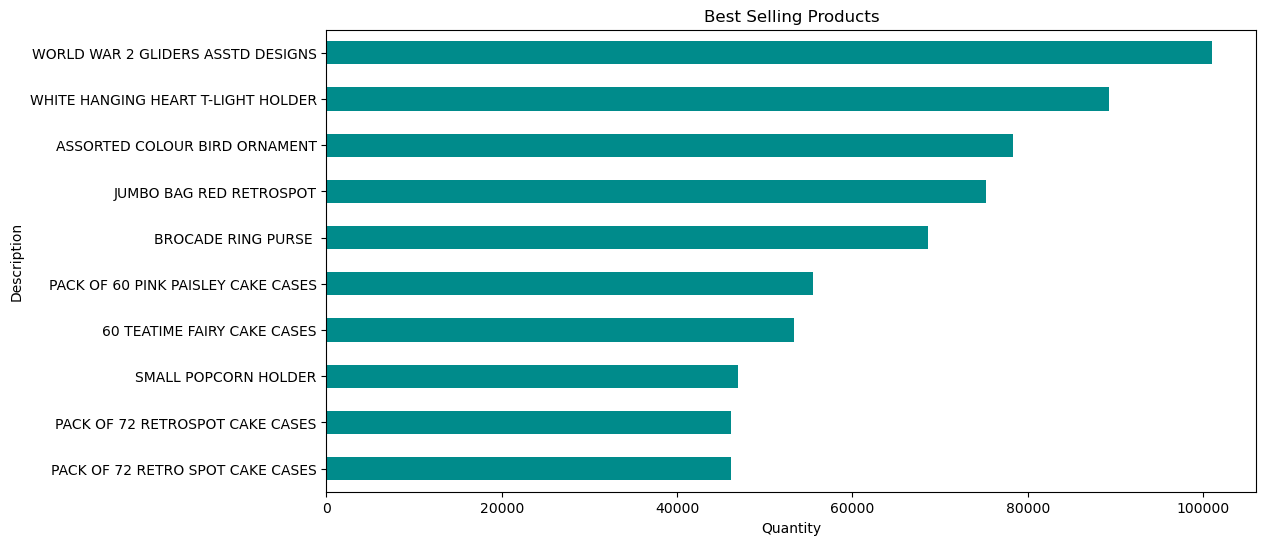

In [398]:
ax =product_quantity.nlargest(10).plot(kind='barh', figsize=(12,6), color='darkcyan')
ax.invert_yaxis()
plt.title('Best Selling Products')
plt.xlabel('Quantity')
plt.show()

The horizontal bar chart above displays the top 10 best-selling products based on the total quantity sold.The results show that 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' has the highest sales, contributing significantly to overall sales volume. This insight suggests that 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' is in high demand, making it a key product to focus on for restocking 

In [406]:
# peak shopping hour
hr_sales = df_cleaned.groupby(['Hour', 'DayOfWeek'])['Invoice'].count().sort_values(ascending = False)
hr_sales

Hour  DayOfWeek
12    Tuesday      28224
      Sunday       27603
      Wednesday    26628
13    Tuesday      26617
      Monday       26588
                   ...  
20    Wednesday       18
19    Wednesday       15
20    Friday           8
11    Saturday         4
21    Thursday         1
Name: Invoice, Length: 86, dtype: int64

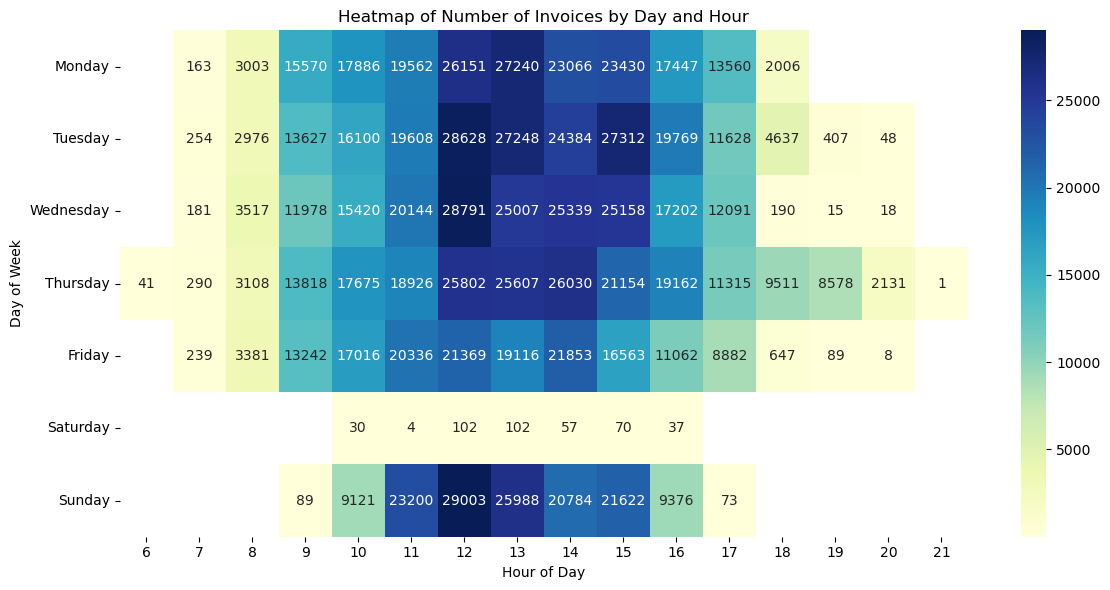

In [407]:
pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', 
                             values='Invoice', aggfunc='count').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Number of Invoices by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

The heatmap shows the distribution of invoices by hour and day of the week. The data reveals a clear peak in activity between 11 AM and 4 PM, indicating that most purchases occur during these hours. Notably, Tuesdays, Wednesdays, and Thursday show the highest concentration of sales, while Saturdays have very few transactions. This unusual dip on Saturdays may point to reduced hours or some other reason